In [20]:
import json
path = "instances_val2017.json"
f = open(path)

anns = json.load(f)

print(anns.keys())

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])


In [21]:
classes=dict()
for ann in anns['categories']:
    classes[ann['id']] = ann['name']

In [ ]:
img_path = '1.jpg' # image path here

In [18]:
import torch
from PIL import Image
import cv2
import torchvision.models.detection as tv
from torchvision import transforms
import matplotlib.pyplot as plt

# Load SSD model
model = tv.ssd300_vgg16()

# Load checkpoint
checkpoint = torch.load("ssd300.pth", map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# Load and preprocess image

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_tensor = transforms.ToTensor()(img)

# Convert single tensor to a list of tensors
img_tensor_list = [img_tensor]

with torch.no_grad():
    prediction = model(img_tensor_list)
    pred = prediction[0]

# Accessing scores and labels
print(pred['scores'], pred['labels'])



tensor([0.9990, 0.9964, 0.7463, 0.5730, 0.5016, 0.2420, 0.2329, 0.2023, 0.2000,
        0.1941, 0.1935, 0.1918, 0.1849, 0.1767, 0.1718, 0.1648, 0.1622, 0.1585,
        0.1584, 0.1580, 0.1570, 0.1566, 0.1560, 0.1536, 0.1521, 0.1506, 0.1500,
        0.1490, 0.1478, 0.1443, 0.1411, 0.1403, 0.1386, 0.1385, 0.1375, 0.1350,
        0.1339, 0.1338, 0.1336, 0.1331, 0.1329, 0.1317, 0.1314, 0.1304, 0.1293,
        0.1292, 0.1272, 0.1270, 0.1269, 0.1266, 0.1257, 0.1254, 0.1252, 0.1247,
        0.1235, 0.1232, 0.1226, 0.1215, 0.1203, 0.1202, 0.1196, 0.1195, 0.1174,
        0.1155, 0.1148, 0.1146, 0.1146, 0.1146, 0.1142, 0.1133, 0.1120, 0.1115,
        0.1098, 0.1086, 0.1084, 0.1081, 0.1079, 0.1076, 0.1075, 0.1069, 0.1068,
        0.1065, 0.1065, 0.1054, 0.1050, 0.1044, 0.1043, 0.1041, 0.1029, 0.1028,
        0.1024, 0.1021, 0.1017, 0.1011, 0.1011, 0.1010, 0.1008, 0.1002, 0.0996,
        0.0992, 0.0987, 0.0985, 0.0979, 0.0977, 0.0976, 0.0969, 0.0967, 0.0965,
        0.0964, 0.0964, 0.0963, 0.0963, 

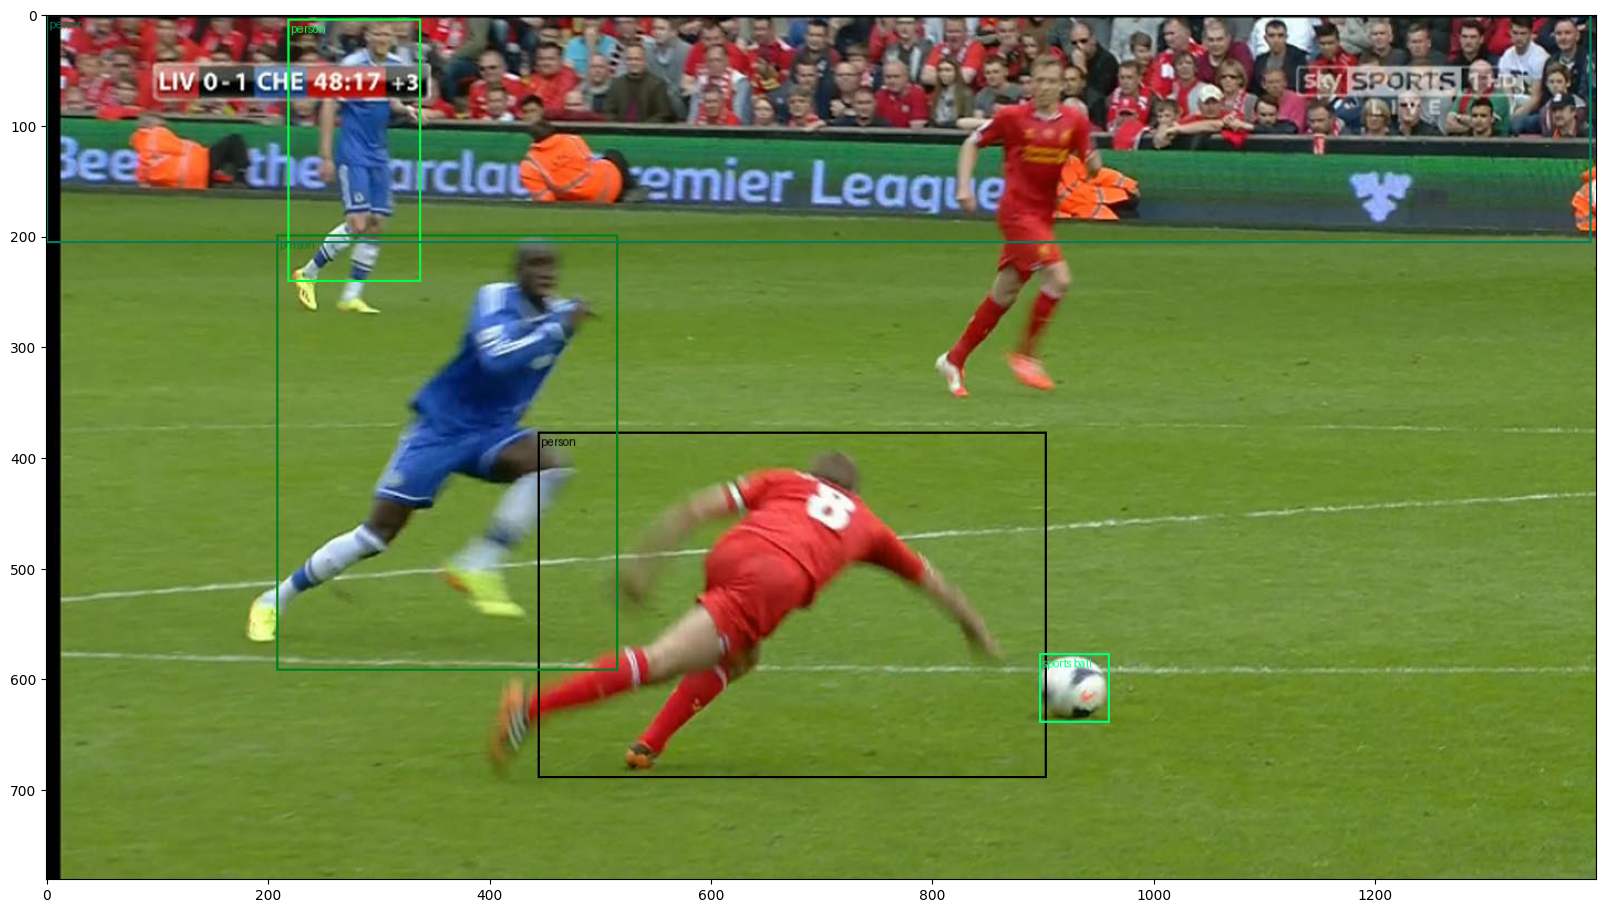

In [19]:
from torchvision.utils import draw_bounding_boxes
fig = plt.figure(figsize=(20, 15))
image = img_tensor.mul(255).byte()
plt.imshow(draw_bounding_boxes(image,
    pred['boxes'][pred['scores'] > 0.5],
    [classes[i] for i in pred['labels'][pred['scores'] > 0.5].tolist()], width=2
).permute(1, 2, 0))

In [ ]:
# For YOLO
from IPython import display
from ultralytics import YOLO

model = YOLO('yolo.pt') # path to model
results = model(img_path)

for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    display(im)  # show image